In [1]:
from utils import Logger
from pathlib import Path
import numpy as np
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
i = 0
recent_logfn = []
for fn in Path('./').iterdir():
    if fn.suffix == '.pkl':
        recent_logfn.append(fn)
recent_logfn

[PosixPath('2019-02-27 08:45:04-enc-base-mr-encthresholds_1.2-1.7-100itr.pkl'),
 PosixPath('2019-02-27 08:40:59-no-enc-base-mr-100itr.pkl')]

In [48]:
i = 1
lgr = Logger(max_size=10000)
fn = recent_logfn[i%len(recent_logfn)]
lgr.import_logs(str(fn))

2019-02-27 08:45:04-enc-base-mr-encthresholds_1.2-1.7-100itr.pkl
Average  internal_rewards 0.00047947545
Average  external_rewards 0.0
2019-02-27 08:40:59-no-enc-base-mr-100itr.pkl
Average  internal_rewards 0.007318703
Average  external_rewards 0.0


Text(0.5, 0.98, '2019-02-27 08:40:59-no-enc-base-mr-100itr.pkl')

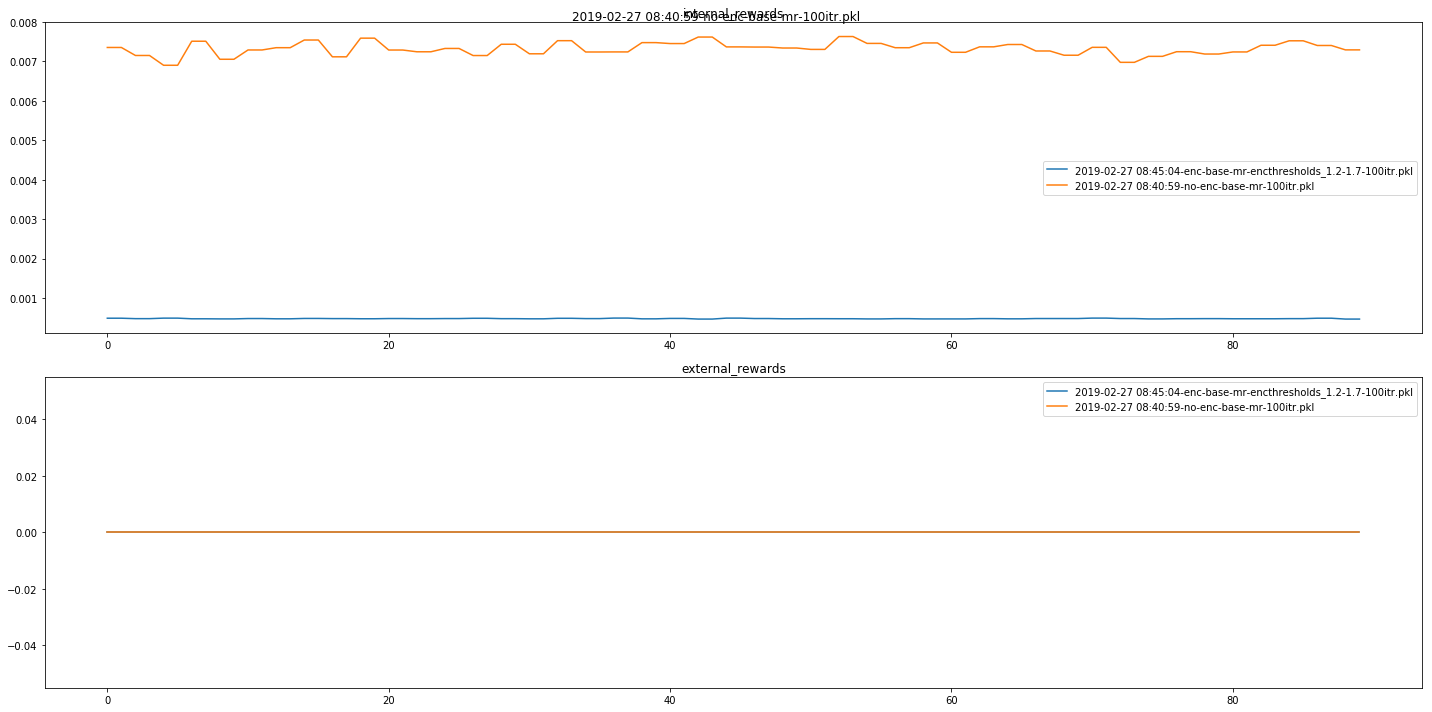

In [49]:
fig, axs = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(20)

for fn in recent_logfn:
    print(fn)
    lgr.import_logs(str(fn))
    logs = [lgr.logs['env']['int_rewards'],
            lgr.logs['env']['ext_rewards']]
    frames = lgr.logs['env']['frames']
    mean_f, max_f = frames[0][0], frames[0][1]

    titles = ['internal_rewards', 'external_rewards']

    for title, log, ax in zip(titles, logs, axs):
        init_log = []
        for l in log:
            if np.array(l).shape == (): init_log.append(l)
            else: init_log.append(np.mean(l))
        log = init_log

        if len(log) > 0: 
            print("Average ", title, np.mean(np.array(log)))
        ax.plot(log[10:],label=str(fn))
        ax.set_title(title)
        
for ax in axs: ax.legend()
fig.tight_layout()
fig.suptitle('{}'.format(fn))

In [50]:
from time import sleep

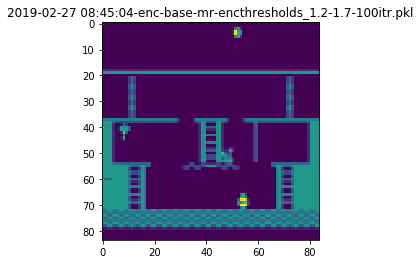

In [53]:
for fn in reversed(recent_logfn):
    plt.title(fn)
    
    lgr.import_logs(str(fn))
    logs = [lgr.logs['env']['int_rewards'],
            lgr.logs['env']['ext_rewards']]
    frames = lgr.logs['env']['frames']
    mean_f, max_f = frames[0][0], frames[0][1]
    rollout = max_f
    
    img = plt.imshow(rollout[0].squeeze())
    for i in range(0, len(rollout), 2):
        img.set_data(rollout[i].squeeze()) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)

2019-02-25 18:06:42-no-enc-base-mr-500itr.pkl
Average  density_loss 1.7805613e-08
Average  policy_actor_loss -0.026294539
Average  policy_critic_loss 0.02132112
Average  internal_rewards 0.00017808611660573797
Average  norm_int_rew -0.3385358950057253
Average  external_rewards 0.0
2019-02-26 15:37:31-enc-base-mr-encthresholds_1.2-1.7-500itr.pkl
Average  density_loss 3.228748e-08
Average  policy_actor_loss -0.0057771713
Average  policy_critic_loss 0.058812346
Average  encoder_loss 1.5949892
Average  internal_rewards 0.0002621881292606876
Average  norm_int_rew -0.27712115365317347
Average  external_rewards 0.0
2019-02-26 22:21:37-enc-base-mr-encthresholds_1.5-1.9-100itr.pkl
Average  density_loss 2.130128e-08
Average  policy_actor_loss -0.0140504725
Average  policy_critic_loss 0.01487342
Average  encoder_loss 1.7719388
Average  internal_rewards 0.0001204658667973288
Average  norm_int_rew -0.12231752728693021
Average  external_rewards 0.0


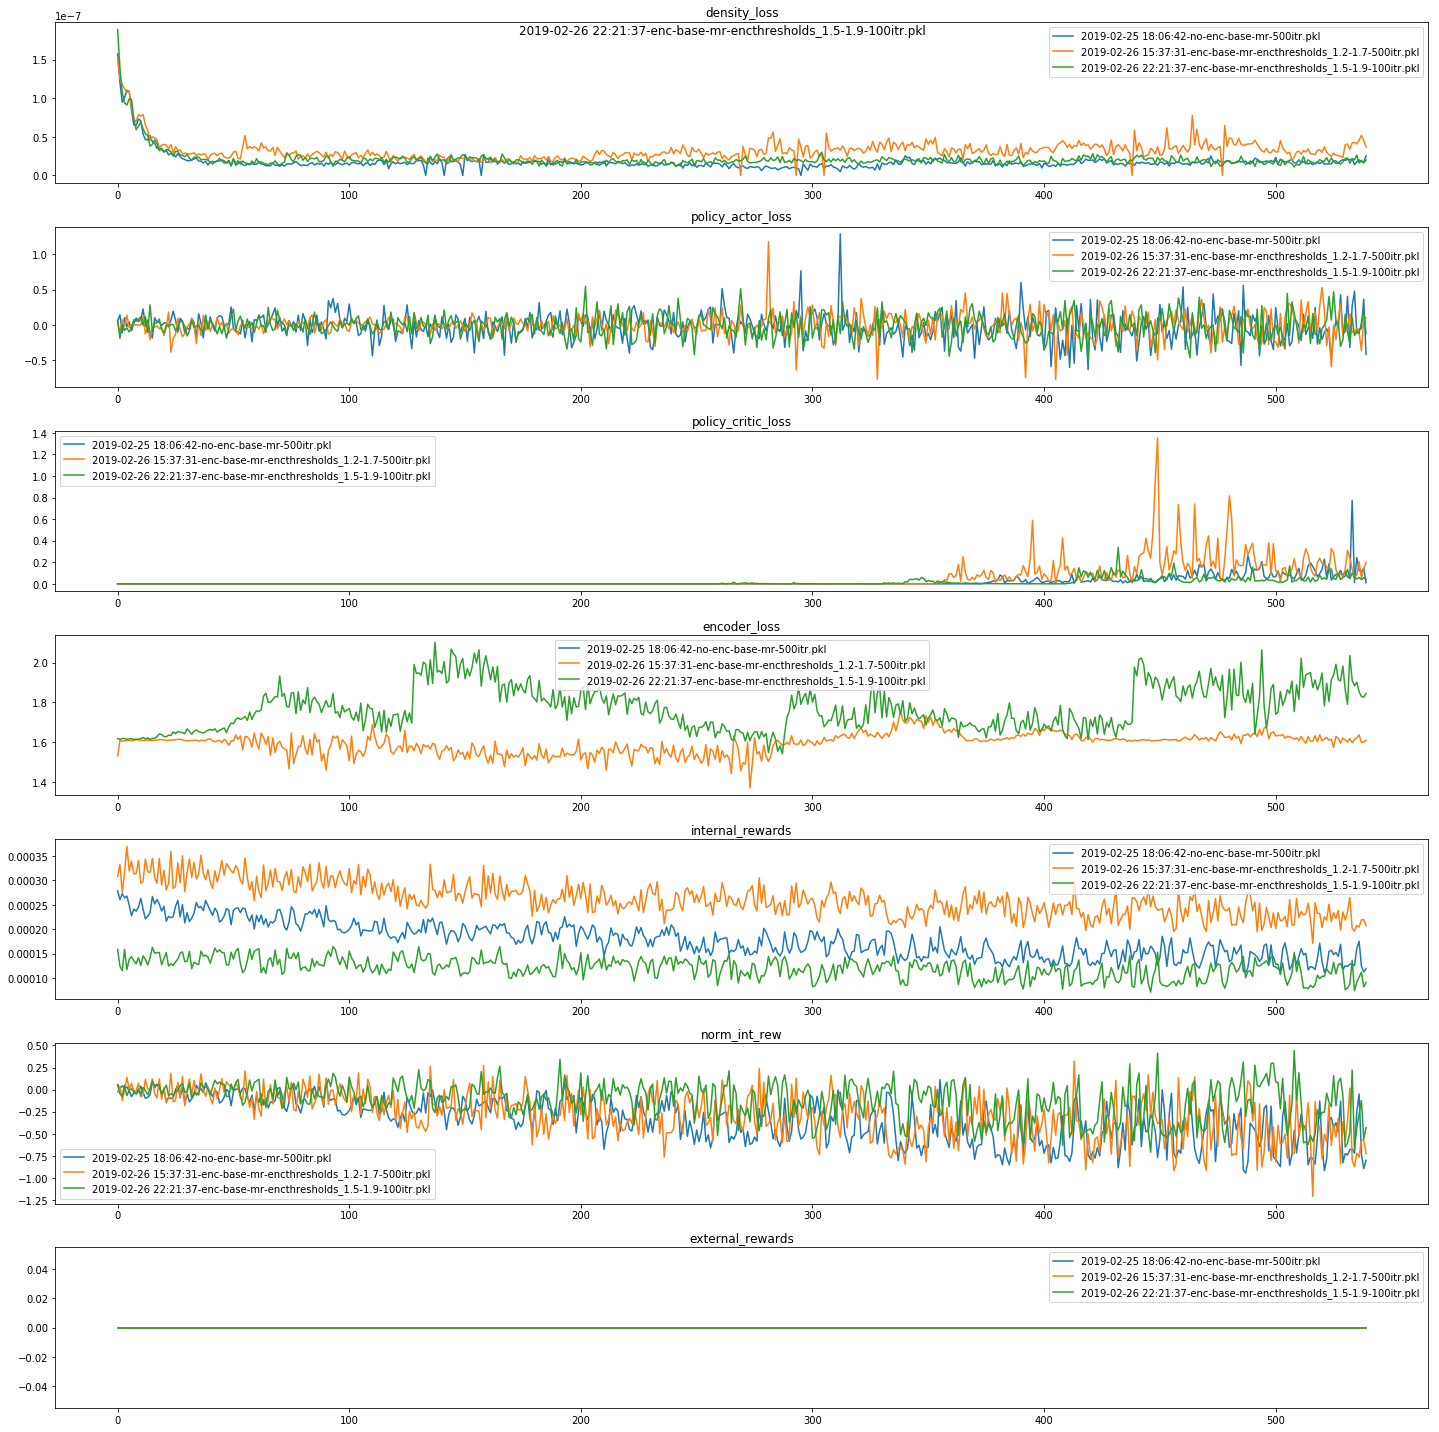

In [26]:
lgr = Logger(max_size=10000)
fig, axs = plt.subplots(7, 1)
fig.set_figheight(20)
fig.set_figwidth(20)

tmp_lgs = [recent_logfn[0], recent_logfn[3], recent_logfn[-1]]
titles = ['density_loss', 'policy_actor_loss', 'policy_critic_loss', 'encoder_loss', 'internal_rewards', 'norm_int_rew', 'external_rewards']
fn = tmp_lgs[i%len(tmp_lgs)]
for fn in tmp_lgs:
    print(fn)
    lgr.import_logs(str(fn))
    logs = [lgr.logs['density']['loss'], 
            lgr.logs['policy']['actor_loss'], 
            lgr.logs['policy']['critic_loss'], 
            lgr.logs['encoder']['loss'],
            lgr.logs['env']['int_rewards'],
            lgr.logs['env']['norm_int_rew'],
            lgr.logs['env']['ext_rewards']]
    for title, log, ax in zip(titles, logs, axs):
#         if title in ['internal_rewards', 'external_rewards', 'norm_int_rew']: 
#             init_log = []
#             for l in log:
#                 if np.array(l).shape == (): init_log.append(l)
#                 else: init_log.append(np.mean(l))
#             log = init_log
        if title in ['internal_rewards', 'external_rewards', 'encoder_loss', 'norm_int_rew']: 
            init_log = []
            for l in log:
                if np.array(l).shape == (): init_log.append(l)
                else: init_log = np.concatenate((init_log, l))
            new_log = []
            bs = 50 #if title == 'policy_actor_loss' else 200
            for i in range(0, len(init_log), bs):
                new_log.append(np.mean(init_log[i:i+bs]))
            log = new_log
        
        if len(log) > 0: 
            print("Average ", title, np.mean(np.array(log[10:550])))
        ax.plot(log[10:550],label=str(fn))
        ax.set_title(title)

for ax in axs: ax.legend()
fig.tight_layout()
fig.suptitle('{}'.format(fn))
plt.show()
i+=1

2019-02-14 14:23:11-no-enc-base-mr-longer.pkl
Average  density_loss 2.5148656e-09
Average  policy_actor_loss -0.022578837
Average  policy_critic_loss 0.30666
Average  running_normalized_internal_rewards 0.032357972
Average  external_rewards 0.0
2019-02-15 15:24:14-enc-base-mr-encthresholds_1.5-1.9-longer.pkl
Average  density_loss 1.903368e-09
Average  policy_actor_loss -0.020103907
Average  policy_critic_loss 0.025793694
Average  encoder_loss 1.7579528
Average  running_normalized_internal_rewards -0.056401815
Average  external_rewards 4.1044786840056264e-07


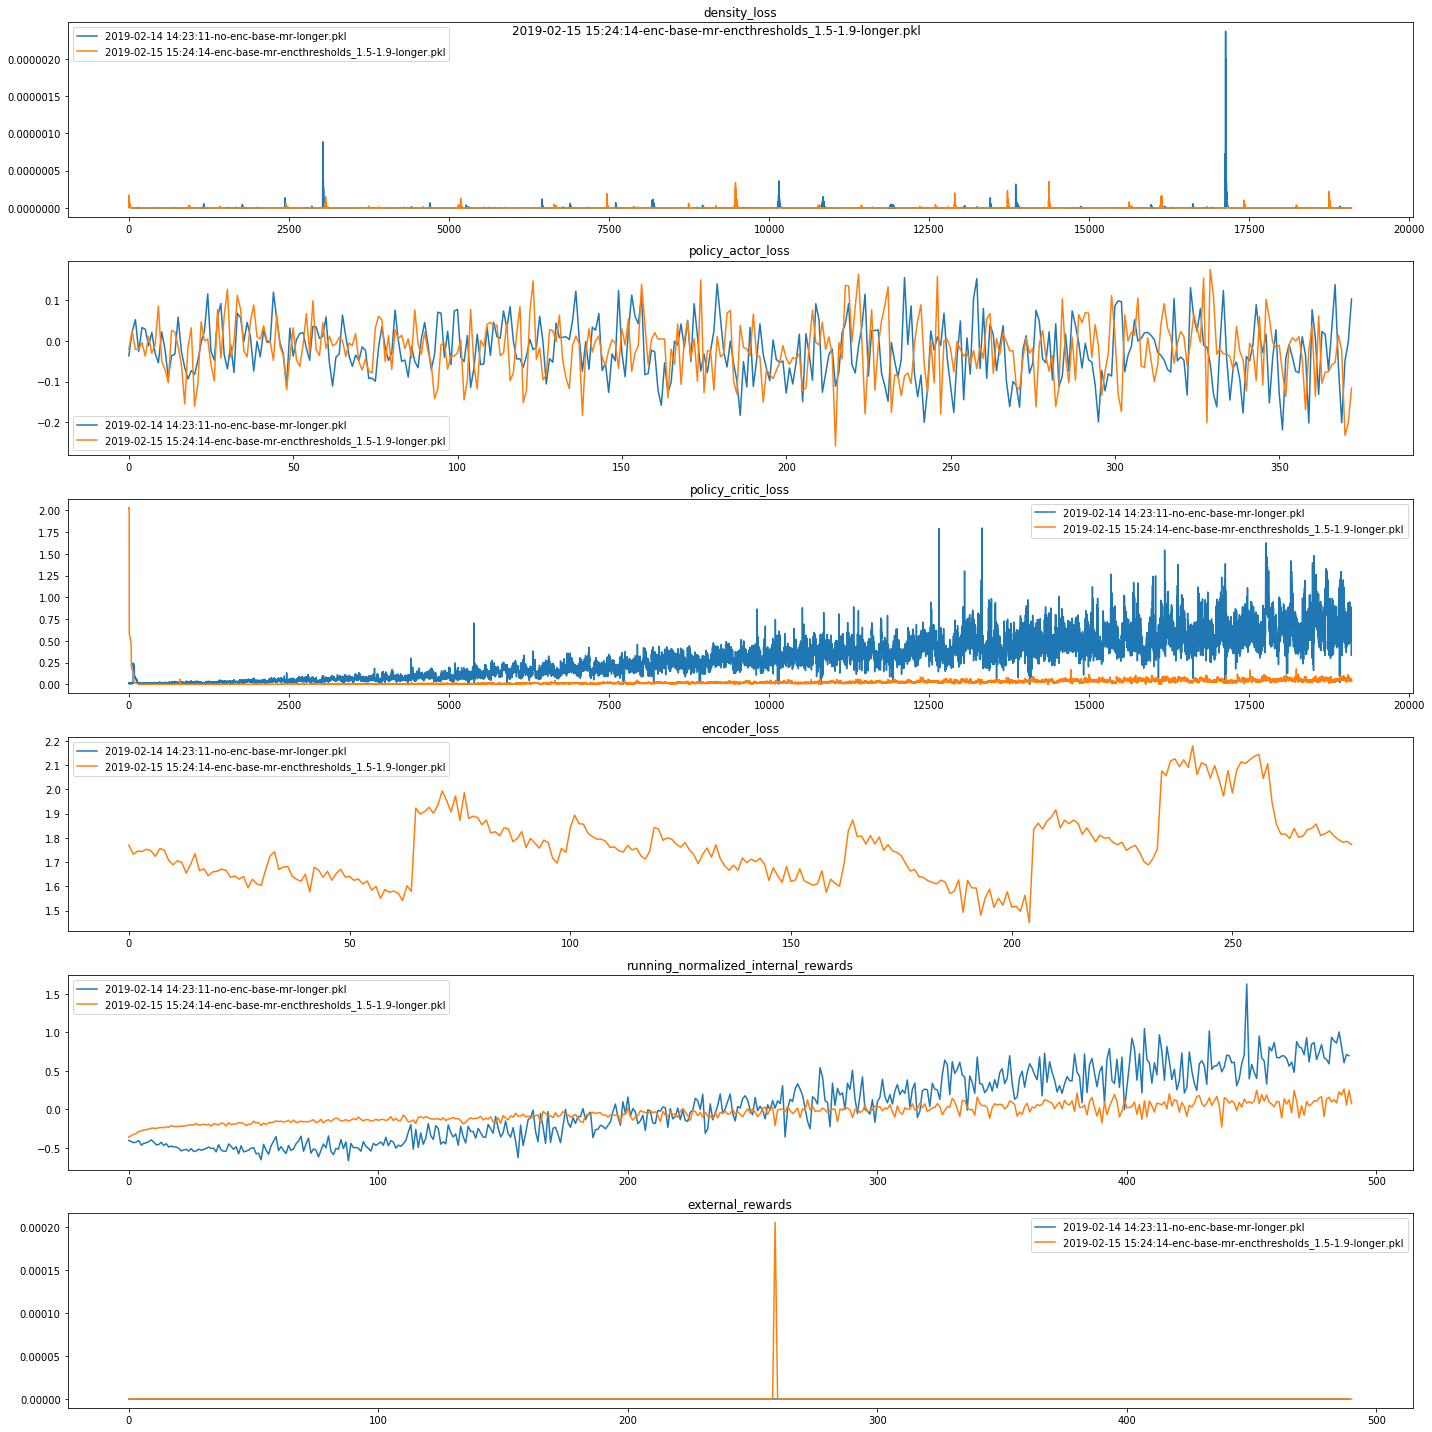

In [28]:
lgr = Logger(max_size=10000)
fig, axs = plt.subplots(6, 1)
fig.set_figheight(20)
fig.set_figwidth(20)

tmp_lgs = [recent_logfn[0], recent_logfn[1]]
titles = ['density_loss', 'policy_actor_loss', 'policy_critic_loss', 'encoder_loss', 'running_normalized_internal_rewards', 'external_rewards']
fn = tmp_lgs[i%len(tmp_lgs)]
for fn in tmp_lgs:
    print(fn)
    lgr.import_logs(str(fn))
    logs = [lgr.logs['density']['loss'], 
            lgr.logs['policy']['actor_loss'], 
            lgr.logs['policy']['critic_loss'], 
            lgr.logs['encoder']['loss'],
            lgr.logs['env']['int_rewards'],
            lgr.logs['env']['ext_rewards']]
    for title, log, ax in zip(titles, logs, axs):
        if title in ['running_normalized_internal_rewards', 'external_rewards']: 
            init_log = []
            for l in log:
                if np.array(l).shape == (): init_log.append(l)
                else: init_log.append(np.mean(l))
            log = init_log
        elif title in ['policy_actor_loss', 'encoder_loss']: 
            init_log = []
            for l in log:
                if np.array(l).shape == (): init_log.append(l)
                else: init_log = np.concatenate((init_log, l))
            new_log = []
            bs = 50 if title == 'policy_actor_loss' else 200
            for i in range(0, len(init_log), bs):
                new_log.append(np.mean(init_log[i:i+bs]))
            log = new_log
        if len(log) > 0: 
            print("Average ", title, np.mean(np.array(log)))
        ax.plot(log[10:],label=str(fn))
        ax.set_title(title)

for ax in axs: ax.legend()
fig.tight_layout()
fig.suptitle('{}'.format(fn))
plt.show()
i+=1